<h1> Modeling

After loading the Data from OECD some preprocessing and Data exploration Tasks follow before the final modeling steps

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load OECD data
df = pd.read_csv('C:/Users/jendr/Desktop/ML auf PISA Daten (Seminar)/Prepared_Data/First_Dataset.csv', index_col=0)
df_column_names = df.columns

# load PISA data
reading_PISA = pd.read_csv(r'C:\Users\jendr\Desktop\ML auf PISA Daten (Seminar)\reading_PISA.csv')
mathematics_PISA = pd.read_csv(r'C:\Users\jendr\Desktop\ML auf PISA Daten (Seminar)\mathematics_PISA.csv')
science_performance_PISA = pd.read_csv(r'C:\Users\jendr\Desktop\ML auf PISA Daten (Seminar)\science_performance_PISA.csv')

# rename columns for better visibility
df.columns = range(0,len(df.columns))

In [24]:
# rename primary key columns and show basic shapes --> PISA Data and OECD Data have only 2012 in common

df = df.rename({0 : "LOCATION" , 1 : "TIME"}, axis=1)
print(df.shape, reading_PISA.shape)
print(df['TIME'].value_counts())
reading_PISA['TIME'].value_counts()

(134, 451) (787, 8)
2012    35
2011    35
2010    35
2013    28
2014     1
Name: TIME, dtype: int64


2015    135
2018    123
2012    115
2009    111
2006    109
2003     99
2000     95
Name: TIME, dtype: int64

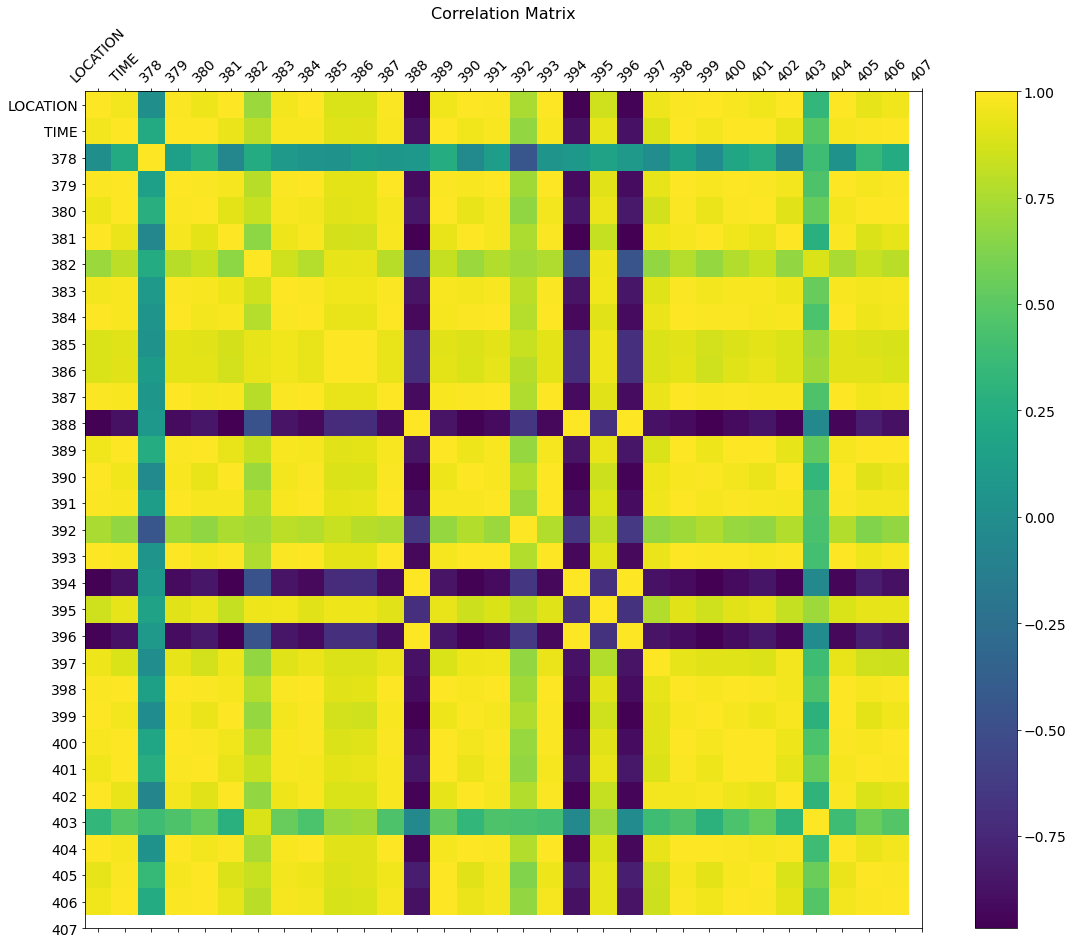

In [25]:
# Prototype correlation matrix for Features of USA

df[df["LOCATION"] == "USA"].dropna(axis=1).corr()
f = plt.figure(figsize=(19, 15))
plt.matshow(df[df["LOCATION"] == "USA"].dropna(axis=1).corr(), fignum=f.number)
plt.xticks(range(df[df["LOCATION"] == "USA"].dropna(axis=1).shape[1]), df[df["LOCATION"] == "USA"].dropna(axis=1).columns, fontsize=14, rotation=45)
plt.yticks(range(df[df["LOCATION"] == "USA"].dropna(axis=1).shape[1]), df[df["LOCATION"] == "USA"].dropna(axis=1).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [26]:
# count values not NAN per row
stats_rows = []
for i in range(0,df.shape[0]):
    temp = len(df.iloc[i].value_counts())
    print("row: ", i, "has ", temp, "values")
    stats_rows.append([df['LOCATION'][i], temp])

row:  0 has  52 values
row:  1 has  52 values
row:  2 has  52 values
row:  3 has  52 values
row:  4 has  44 values
row:  5 has  44 values
row:  6 has  44 values
row:  7 has  52 values
row:  8 has  52 values
row:  9 has  52 values
row:  10 has  50 values
row:  11 has  38 values
row:  12 has  36 values
row:  13 has  36 values
row:  14 has  36 values
row:  15 has  30 values
row:  16 has  30 values
row:  17 has  30 values
row:  18 has  26 values
row:  19 has  20 values
row:  20 has  20 values
row:  21 has  20 values
row:  22 has  18 values
row:  23 has  28 values
row:  24 has  28 values
row:  25 has  28 values
row:  26 has  28 values
row:  27 has  56 values
row:  28 has  56 values
row:  29 has  44 values
row:  30 has  44 values
row:  31 has  38 values
row:  32 has  38 values
row:  33 has  38 values
row:  34 has  40 values
row:  35 has  40 values
row:  36 has  40 values
row:  37 has  42 values
row:  38 has  84 values
row:  39 has  84 values
row:  40 has  84 values
row:  41 has  74 values
ro

<AxesSubplot:xlabel='LOCATION'>

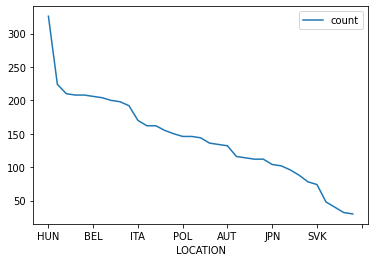

In [27]:
# count and plot values not NAN per country
counts = pd.DataFrame(stats_rows, columns= ['LOCATION', "count"])
counts.groupby(by = 'LOCATION').sum().sort_values(by ='count', ascending=False).plot()

In [28]:
# count values not NAN per column
stats_column = []
for i in range(0,df.shape[1]):
    temp = df.iloc[:,i].value_counts().sum()
    #print("row: ", i, "has ", temp, "values")
    stats_column.append([i, temp])
stats_column

[[0, 134],
 [1, 134],
 [2, 4],
 [3, 4],
 [4, 4],
 [5, 4],
 [6, 4],
 [7, 4],
 [8, 4],
 [9, 4],
 [10, 4],
 [11, 4],
 [12, 4],
 [13, 4],
 [14, 4],
 [15, 4],
 [16, 4],
 [17, 4],
 [18, 4],
 [19, 4],
 [20, 4],
 [21, 4],
 [22, 4],
 [23, 4],
 [24, 4],
 [25, 4],
 [26, 4],
 [27, 4],
 [28, 4],
 [29, 4],
 [30, 120],
 [31, 75],
 [32, 87],
 [33, 72],
 [34, 121],
 [35, 98],
 [36, 79],
 [37, 67],
 [38, 45],
 [39, 42],
 [40, 26],
 [41, 44],
 [42, 24],
 [43, 48],
 [44, 26],
 [45, 22],
 [46, 82],
 [47, 55],
 [48, 98],
 [49, 40],
 [50, 125],
 [51, 117],
 [52, 44],
 [53, 58],
 [54, 34],
 [55, 29],
 [56, 56],
 [57, 31],
 [58, 54],
 [59, 40],
 [60, 34],
 [61, 34],
 [62, 28],
 [63, 58],
 [64, 58],
 [65, 39],
 [66, 39],
 [67, 42],
 [68, 39],
 [69, 58],
 [70, 34],
 [71, 28],
 [72, 58],
 [73, 58],
 [74, 36],
 [75, 31],
 [76, 39],
 [77, 33],
 [78, 36],
 [79, 30],
 [80, 66],
 [81, 44],
 [82, 58],
 [83, 55],
 [84, 63],
 [85, 55],
 [86, 57],
 [87, 26],
 [88, 21],
 [89, 16],
 [90, 27],
 [91, 28],
 [92, 4],
 [93, 4],


<AxesSubplot:xlabel='column'>

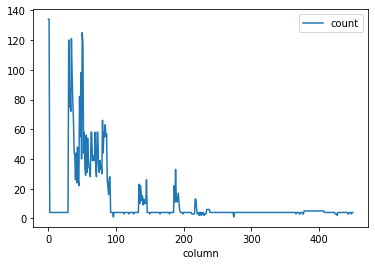

In [29]:
# count and plot values not NAN per column
counts = pd.DataFrame(stats_column, columns= ['column', "count"])
counts.plot(x = 'column', y = 'count')

In [30]:
columnss = list(counts[counts['count'] > 120].index.values)
columnss[0], columnss[1] = "LOCATION", "TIME"
df_stag = df[columnss]
df_stag

,LOCATION,TIME,34,50
AUS-2010,AUS,2010,1.501028e+06,71314.787279
AUS-2011,AUS,2011,1.592327e+06,46980.640395
AUS-2012,AUS,2012,1.709001e+06,51668.108477
AUS-2013,AUS,2013,1.544113e+06,48109.468495
AUT-2010,AUT,2010,2.172862e+05,90547.593053
...,...,...,...,...
SVN-2013,SVN,2013,1.427189e+04,3631.680569
LVA-2010,LVA,2010,NaN,NaN
LVA-2011,LVA,2011,NaN,NaN
LVA-2012,LVA,2012,NaN,NaN


<h1> Modeling Part

In [31]:
# import libraries for Modeling Task
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import numpy as np

neg_mean_squared_error_scorer = make_scorer(mean_squared_error,
                                        greater_is_better=False)

In [32]:
# Grid Search for best number of columns based on NaNs in columns with Regressors

for option in range(0,134):    
    # iterate over columns with 100% NaNs to 0% NaNs
    columnss = list(counts[counts['count'] > option].index.values)
    columnss[0], columnss[1] = "LOCATION", "TIME"
    df_stag = df[columnss]

    # preprocessing for modeling merge and split in X_stag, y_stag
    reading = df_stag.merge(target, how = 'inner', on=['LOCATION', 'TIME'])
    X_stag = reading.iloc[:,:-1]
    y_stag = reading.iloc[:, -1]

    # encoding of categorical features Location and Time
    le = preprocessing.LabelEncoder()
    X_stag['LOCATION'] = le.fit_transform(X_stag['LOCATION'])
    X_stag['TIME'] = le.fit_transform(X_stag['TIME'])
    
    # impute NANs with 0
    X_stag = X_stag.fillna(0)
    
    # Linear Regression
    reg = LinearRegression().fit(X_stag, y_stag)
    score_reg = reg.score(X_stag, y_stag)
    print("option: ", option, "reg_score (R^2) is: ", score_reg)
    
    # Decision Tree Regressor
    regressor = DecisionTreeRegressor()
    cv_results = cross_validate(regressor, X_stag, y_stag, scoring=neg_mean_squared_error_scorer, cv=10, return_estimator = True)
    print("Decision Tree Regression score is: ", cv_results['test_score'].mean())

option:  0 reg_score (R^2) is:  0.6696990388965391
Decision Tree Regression score is:  -789.0918827780046
option:  1 reg_score (R^2) is:  0.6890414292884155
Decision Tree Regression score is:  -778.0926645098231
option:  2 reg_score (R^2) is:  0.6908334940572485
Decision Tree Regression score is:  -793.3495182697473
option:  3 reg_score (R^2) is:  0.6895405643206276
Decision Tree Regression score is:  -756.0842260469444
option:  4 reg_score (R^2) is:  0.6908429117795343
Decision Tree Regression score is:  -673.8319714068688
option:  5 reg_score (R^2) is:  0.6908429117795343
Decision Tree Regression score is:  -718.8428573273992
option:  6 reg_score (R^2) is:  0.6908429117795343
Decision Tree Regression score is:  -678.7788215190656
option:  7 reg_score (R^2) is:  0.6908429117795343
Decision Tree Regression score is:  -733.6667227095202
option:  8 reg_score (R^2) is:  0.6908429117795343
Decision Tree Regression score is:  -795.1972978489142
option:  9 reg_score (R^2) is:  0.690842911779

Decision Tree Regression score is:  -766.6761424943686
option:  78 reg_score (R^2) is:  0.2895175639090555
Decision Tree Regression score is:  -766.8279504364896
option:  79 reg_score (R^2) is:  0.2675314149043526
Decision Tree Regression score is:  -827.3404974386109
option:  80 reg_score (R^2) is:  0.2675314149043526
Decision Tree Regression score is:  -956.3999578798232
option:  81 reg_score (R^2) is:  0.2675314149043526
Decision Tree Regression score is:  -739.675839798914
option:  82 reg_score (R^2) is:  0.2501962345780232
Decision Tree Regression score is:  -762.0592619340656
option:  83 reg_score (R^2) is:  0.2501962345780232
Decision Tree Regression score is:  -940.6873224252018
option:  84 reg_score (R^2) is:  0.2501962345780232
Decision Tree Regression score is:  -857.4478112455809
option:  85 reg_score (R^2) is:  0.2501962345780232
Decision Tree Regression score is:  -793.8452343431566
option:  86 reg_score (R^2) is:  0.2501962345780232
Decision Tree Regression score is:  -7

<h1> Anhang

In [377]:
# show PISA Data for one Country
target[target["LOCATION"] == "USA"]

,LOCATION,TIME,Value
392,USA,2000,490.000
393,USA,2003,479.000
394,USA,2009,488.000
395,USA,2012,482.498
396,USA,2015,487.000
397,USA,2018,494.000
398,USA,2000,518.000
399,USA,2003,511.000
400,USA,2009,513.000
401,USA,2012,513.269


In [22]:
# better option...
df.iloc[:,:].count().sort_values(ascending=False)

LOCATION    134
TIME        134
50          125
34          121
30          120
           ... 
427           2
223           2
226           2
96            1
274           1
Length: 451, dtype: int64

In [17]:
# Values to NaNs in Dataset %
sum(counts["count"])/(134*451)

0.08693781646093258

In [ ]:
# preprocessing for modeling merge and split in X_stag, y_stag
target = reading_PISA[['LOCATION', 'TIME' ,'Value']]

reading = df_stag.merge(target, how = 'inner', on=['LOCATION', 'TIME'])
X_stag = reading.iloc[:,:-1]
y_stag = reading.iloc[:, -1]

print(X_stag.shape, y_stag.shape)

# encoding of categorical features Location and Time
from sklearn import preprocessing
#from sklearn.impute import SimpleImputer

le = preprocessing.LabelEncoder()
X_stag['LOCATION'] = le.fit_transform(X_stag['LOCATION'])
X_stag['TIME'] = le.fit_transform(X_stag['TIME'])

# impute missing values
#imp = SimpleImputer(missing_values = np.nan,strategy_stag = 'mean')
# X_stag = pd.DataFrame(imp.fit_transform(X_stag)) 

# imputation of NANs with 0
X_stag = X_stag.fillna(0)

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_stag, y_stag)
reg.score(X_stag, y_stag)

In [295]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [296]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
neg_mean_squared_error_scorer = make_scorer(mean_squared_error,
                                        greater_is_better=False)

regressor = DecisionTreeRegressor()
cv_results = cross_validate(regressor, X, y, scoring=neg_mean_squared_error_scorer, cv=10, return_estimator = True)

In [297]:
cv_results['test_score'].mean()

-811.1096695955808

In [299]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6696990388965391

In [300]:
y_pred = reg.predict(X)
mean_squared_error(y_pred,y)

266.0716236603274

In [303]:
y

0      495.090
1      529.542
2      512.000
3      471.093
4      508.021
        ...   
98     486.000
99     454.466
100    510.150
101    481.000
102    489.000
Name: Value, Length: 103, dtype: float64

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = MLPRegressor(hidden_layer_sizes = (451,451), random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

NameError: name 'X' is not defined

In [307]:
y_train

55    524.761
66    468.390
35    483.000
10    540.657
2     512.000
       ...   
75    457.991
9     505.512
72    473.806
12    473.983
37    537.669
Name: Value, Length: 77, dtype: float64

In [298]:
y.describe()

count    103.000000
mean     496.493087
std       28.520878
min      411.365000
25%      481.891000
50%      498.317000
75%      512.395000
max      555.708000
Name: Value, dtype: float64